In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [35]:
data=pd.read_csv("advertising.csv")
df=pd.DataFrame(data)

In [36]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [37]:
encoder = LabelEncoder()
df["Radio"]=encoder.fit_transform(df["Radio"])
df["TV"]=encoder.fit_transform(df["TV"])
df["Newspaper"]=encoder.fit_transform(df["Newspaper"])

In [38]:
X=df.drop(columns='Sales',axis=1)
y=df["Sales"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,), name="input_layer"),
    tf.keras.layers.Dense(units=3, activation='relu', name="hidden_layer1"),
    tf.keras.layers.Dense(units=3, activation='relu', name="hidden_layer2"),
    tf.keras.layers.Dense(units=3, activation=None, name="output_layer")
])


# Compile the model
model.compile(optimizer='sgd', loss='mse')  # sgd stands for Stochastic Gradient Descent

# Print a summary of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 3)                 12        
                                                                 
 hidden_layer2 (Dense)       (None, 3)                 12        
                                                                 
 output_layer (Dense)        (None, 3)                 12        
                                                                 
Total params: 36 (144.00 Byte)
Trainable params: 36 (144.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


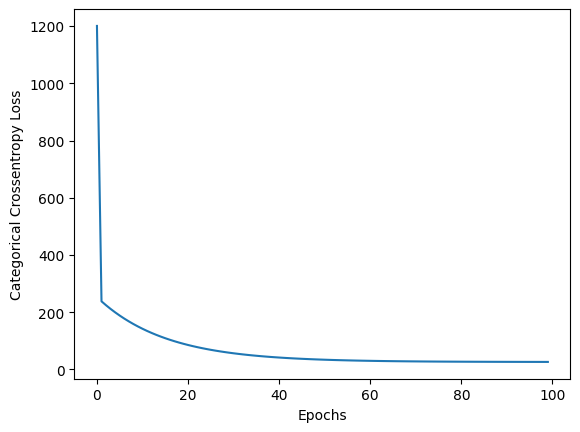

In [40]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
# Plot the training history
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy Loss')
plt.show()

In [49]:
train_loss = model.evaluate(X_train, y_train, verbose=0)#to predict the value and to find the mean square error between them
print(f'Training Loss: {train_loss}')

# Evaluate on testing data
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Testing Loss: {test_loss}')

Training Loss: 26.41718101501465
Testing Loss: 33.72275924682617
